In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob



In [2]:
# Set the style for seaborn
sns.set(style="whitegrid")



 Load the comments dataset


In [3]:
data = pd.read_csv('/Users/yashikasingh/Downloads/climate_nasa.csv')



In [4]:
# Check the columns in the DataFrame
print("Columns in the dataset:")
print(data.columns)



Columns in the dataset:
Index(['date', 'likesCount', 'profileName', 'commentsCount', 'text'], dtype='object')


In [5]:
# Strip whitespace from column names
data.columns = data.columns.str.strip()



 Explore the dataset


In [6]:
print(data.head())  # Display the first few rows of the dataset



                       date  likesCount  \
0  2022-09-07T17:12:32.000Z           2   
1  2022-09-08T14:51:13.000Z           0   
2  2022-09-07T17:19:41.000Z           1   
3  2022-09-08T00:51:30.000Z           4   
4  2022-09-07T19:06:20.000Z          16   

                                         profileName  commentsCount  \
0  4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...            NaN   
1  518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...            NaN   
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...            3.0   
3  37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...            NaN   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...           26.0   

                                                text  
0  Neat comparison I have not heard it before.\n ...  
1  An excellent way to visualise the invisible! T...  
2  Does the CO2/ghg in the troposphere affect the...  
3  excellent post! I defo feel the difference - o...  
4  Yes, and carbon dioxide does not har

 Data Visualization


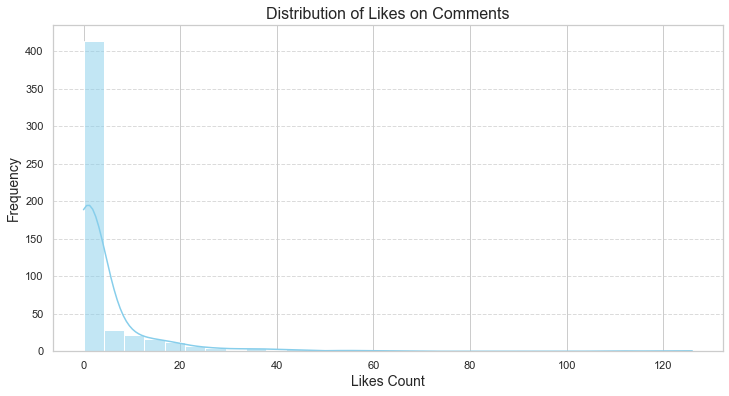

In [7]:
# Visualize the distribution of likes on comments
plt.figure(figsize=(12, 6))
sns.histplot(data['likesCount'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Likes on Comments', fontsize=16)
plt.xlabel('Likes Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



 Data Preprocessing


In [8]:
# Handle missing values (if any)
data.dropna(inplace=True)



Sentiment Analysis


In [9]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity



In [10]:
# Apply the sentiment function to the 'text' column
data['sentiment'] = data['text'].apply(get_sentiment)



In [11]:
# Categorize sentiment
data['sentiment_category'] = pd.cut(data['sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])



In [12]:
# Display the first few rows with sentiment scores
print(data[['text', 'sentiment', 'sentiment_category']].head())



                                                text  sentiment  \
2  Does the CO2/ghg in the troposphere affect the...      0.000   
4  Yes, and carbon dioxide does not harm the Eart...     -0.375   
5  Excellent example...very relatable to the Gen ...      0.350   
7  Has the Earth ever had a concentration of over...      0.000   
9  Historical co2 data would make it an interesti...      0.250   

  sentiment_category  
2            Neutral  
4           Negative  
5           Positive  
7            Neutral  
9           Positive  


 Visualize Sentiment Distribution


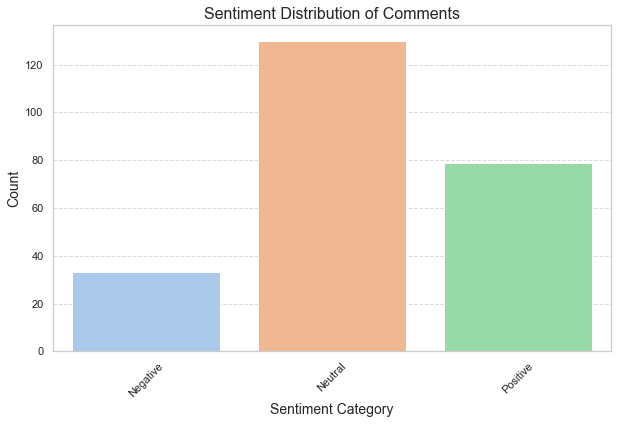

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='sentiment_category', palette='pastel')
plt.title('Sentiment Distribution of Comments', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



 Generate a WordCloud for the comments


In [14]:
comments_text = ' '.join(data['text'])  # Combine all comments into a single string



In [18]:
# Specify a TrueType font path
font_path = "/Users/yashikasingh/Downloads/dejavu-fonts-ttf-2.37/ttf/DejaVuSans.ttf"

In [19]:
# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', 
                      max_words=200, 
                      colormap='viridis', 
                      font_path=font_path).generate(comments_text)




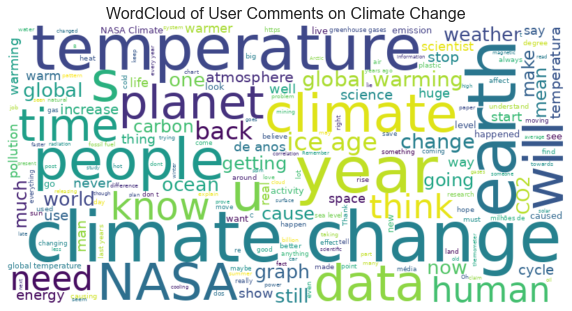

In [20]:
# Display the generated image
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of User Comments on Climate Change', fontsize=16)
plt.show()

 Summary Statistics for Sentiment


In [21]:
print("\nSummary Statistics for Sentiment:")
print(data['sentiment'].describe())




Summary Statistics for Sentiment:
count    242.000000
mean       0.070486
std        0.214789
min       -0.790625
25%        0.000000
50%        0.000000
75%        0.200000
max        0.625000
Name: sentiment, dtype: float64


 Documentation and Reporting


In [22]:
# Save the comments and sentiment analysis results for reporting purposes
with open('comments_report.txt', 'w') as report_file:
    report_file.write('User  Comments on Climate Change:\n\n')
    report_file.write(data[['text', 'sentiment', 'sentiment_category']].to_string(index=False))

print("Project completed successfully! User comments and sentiment analysis saved in 'comments_report.txt'.")

Project completed successfully! User comments and sentiment analysis saved in 'comments_report.txt'.
